In [2]:
class Tree:   
    def __init__(self, value=None):
        self.value = value
        self.left = None # left child
        self.right = None # right child
    # add method
    def add(self,value):
        if self.value:
            if value < self.value:
                if self.left is None:
                    self.left = Tree(value)
                else:
                    self.left.add(value)
            elif value > self.value:
                if self.right is None:
                    self.right = Tree(value)
                else:
                    self.right.add(value)
        else:
            self.value = value 
    # __contains__ method
    def __contains__(self, item):
        if self.value == item:
            return True
        if item < self.value and self.left:
            return item in self.left
        elif item > self.value and self.right:
            return item in self.right
        else:
            return False 

In [3]:
my_tree = Tree()
for item in [55, 62, 37, 49, 71, 14, 17]:
    my_tree.add(item)

In [4]:
print(f'my_tree.__contains__(55) = ' f'{55 in my_tree}')

my_tree.__contains__(55) = True


In [5]:
print(f'my_tree.__contains__(42) = ' f'{42 in my_tree}')

my_tree.__contains__(42) = False


Using various sizes n of trees (populated with random data) and sufficiently many calls to in (each individual call should be very fast, so you may have to run many repeated tests), demonstrate that in is executing in O(log n) times; on a log-log plot, for sufficiently large n, the graph of time required for checking if a number is in the tree as a function of n should be almost horizontal. (5 points).

This speed is not free. Provide supporting evidence that the time to setup the tree is O(n log n) by timing it for various sized ns and showing that the runtime lies between a curve that is O(n) and one that is O(n**2). (5 points)

Note: the tree searches are not guaranteed to be able to run in exactly O(log n) time because the tree might not be balanced, but as long as n is large enough and your numbers are generated randomly, you can expect the tree to be nearly balanced.

n=1
n=10
n=100
n=1000
n=10000
n=100000
n=1000000
runtime = [2.2999884095042944e-06, 2.4999899324029684e-06, 1.2099990271963179e-05, 2.5200002710334957e-05, 2.1500003640539944e-05, 2.139998832717538e-05, 2.1100000594742596e-05]


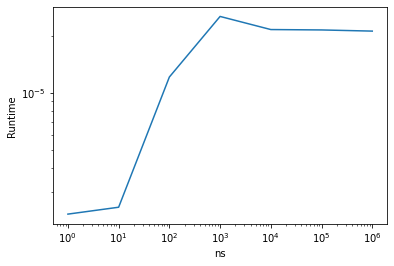

In [9]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

random.seed(1)

def timeit(n):
    times = []
    print(f"n={n}")
    n = [random.randint(1,n) for _ in range(n)]
    my_tree = Tree()
    for item in n:
        my_tree.add(item)
    for attemp in [i for i in range(1000)]:
        start = time.perf_counter()
        for num in [j for j in range(1,100,10)]:
            num in my_tree
        end = np.average((time.perf_counter() - start))
        times.append(end)
    return min(times)

ns = [1,10,100,1000,1e4,1e5,1e6]
runtime = [timeit(int(n))for n in ns]

plt.plot(ns, runtime)
print(f"runtime = {runtime}")
plt.ylabel('Runtime')
plt.xlabel('ns')
plt.xscale("log")
plt.yscale("log")
plt.show()

runtime = [3.9998849388211966e-07, 0.00010269999620504677, 0.001921500006574206, 0.028227699993294664, 0.4591989000036847]


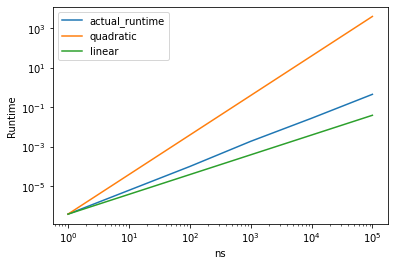

In [11]:
random.seed(1)

def timeit(n):
    times = []
    n = [random.randint(1,n) for _ in range(n)]
    for attemp in [i for i in range(100)]:
        start = time.perf_counter()
        my_tree = Tree()
        for item in n: 
            my_tree.add(item)
        times.append(time.perf_counter() - start)
    return min(times) 

ns = [1,100,1000,1e4,1e5]
actual_runtime = [timeit(int(n)) for n in ns]
scale = actual_runtime[0]
quadratic = [scale * n**2 for n in ns]
linear = [scale * n for n in ns]

plt.plot(ns, actual_runtime)
print(f"runtime = {actual_runtime}")
plt.plot(ns, quadratic)
plt.plot(ns, linear)
plt.ylabel('Runtime')
plt.xlabel('ns')
plt.xscale("log")
plt.yscale("log")
plt.legend(['actual_runtime','quadratic','linear'],loc='upper left')
plt.show()